In [1]:
#Import the libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('EastWestAirlines (3).xlsx')

In [3]:
df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


df.info()

# KMeans

In [25]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

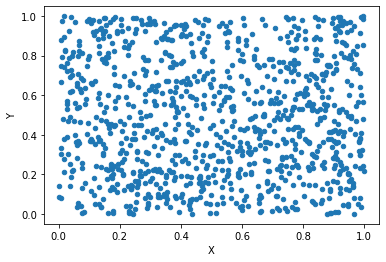

In [55]:

df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [57]:
X = np.random.uniform(0,1,20)
X

array([0.04506808, 0.73514011, 0.0648824 , 0.60436053, 0.66616667,
       0.14502508, 0.72491826, 0.21193118, 0.95766304, 0.8084307 ,
       0.43915323, 0.4036333 , 0.49485713, 0.30733879, 0.14197273,
       0.84374754, 0.00415981, 0.43566451, 0.38564736, 0.54502355])

<AxesSubplot:xlabel='X', ylabel='Y'>

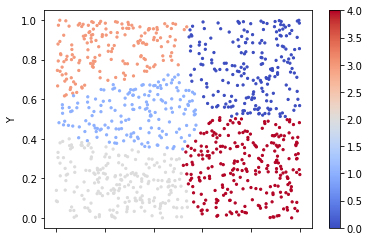

In [58]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=5,cmap=plt.cm.coolwarm)


In [59]:
df = pd.read_excel('EastWestAirlines (3).xlsx')

In [72]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(15)# Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0.666667
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1.000000
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0.333333
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0.666667
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0.333333
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0.666667
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0.666667
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,0.333333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0.666667
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,1.000000


In [61]:
# Elbow curve

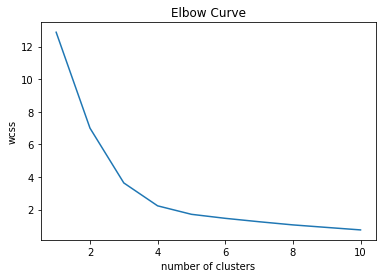

In [62]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [63]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([2, 3, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [64]:
md = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust'] = md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [65]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
1,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


# Hierarchical clustering

In [66]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

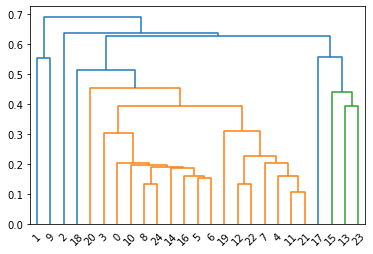

In [67]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

# 

In [68]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [69]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [70]:
y_hc

array([3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 3], dtype=int64)

In [71]:
Clusters

,Clusters
0,3
1,1
2,2
3,3
4,3
5,3
6,3
7,3
8,3
9,1
